In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import cm

In [2]:
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 8,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 510 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * ratio  # height in inches
fig_size = [fig_width, fig_height]
rcParams.update({'figure.figsize': fig_size})

In [3]:
sns.set_context("paper")

In [4]:
qs = np.linspace(0,1,20)
ps = np.linspace(0,1,20)

Ps, Qs = np.meshgrid(ps, qs)

/home/lucasb/anaconda3/envs/TCR/lib/python3.6/site-packages/ipykernel_launcher.py:153: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


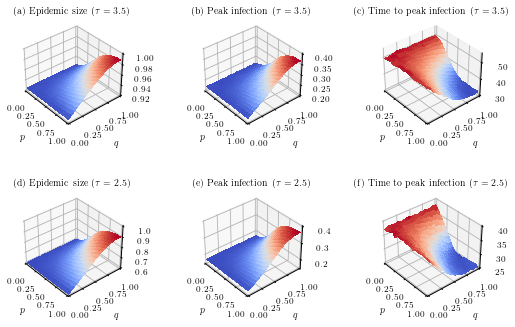

In [12]:
#fig, ax = plt.subplots(ncols=3)
mosaic = """
    ABC
    DEF
    """

N = 1e4

fig = plt.figure(constrained_layout=True)

ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

ax["A"].remove()
ax["A"]=fig.add_subplot(2,3,1,projection='3d')
ax["B"].remove()
ax["B"]=fig.add_subplot(2,3,2,projection='3d')
ax["C"].remove()
ax["C"]=fig.add_subplot(2,3,3,projection='3d')
ax["D"].remove()
ax["D"]=fig.add_subplot(2,3,4,projection='3d')
ax["E"].remove()
ax["E"]=fig.add_subplot(2,3,5,projection='3d')
ax["F"].remove()
ax["F"]=fig.add_subplot(2,3,6,projection='3d')

s_arr_25 = []
i_arr_25 = []
t_arr_25 = []

s_arr_35 = []
i_arr_35 = []
t_arr_35 = []

for q in qs:
    for p in ps:
        
        s_arr_25_ = []
        i_arr_25_ = []
        t_arr_25_ = []

        s_arr_35_ = []
        i_arr_35_ = []
        t_arr_35_ = []
        
        for e in range(230):
            
            s = np.load("../data/random_edge_removal/3.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/random_edge_removal/3.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/random_edge_removal/3.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            
            s_arr_35_.append(float(s)/N)
            i_arr_35_.append(float(i)/N)
            t_arr_35_.append(float(t))
            
            s = np.load("../data/random_edge_removal/2.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/random_edge_removal/2.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/random_edge_removal/2.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")

            s_arr_25_.append(float(s)/N)
            i_arr_25_.append(float(i)/N)
            t_arr_25_.append(float(t))

        s_arr_35.append(np.mean(s_arr_35_))
        i_arr_35.append(np.mean(i_arr_35_))
        t_arr_35.append(np.mean(t_arr_35_))
        
        s_arr_25.append(np.mean(s_arr_25_))
        i_arr_25.append(np.mean(i_arr_25_))
        t_arr_25.append(np.mean(t_arr_25_))
 
s_arr_25 = np.array(s_arr_25).reshape(len(qs),len(ps))
i_arr_25 = np.array(i_arr_25).reshape(len(qs),len(ps))
t_arr_25 = np.array(t_arr_25).reshape(len(qs),len(ps))

s_arr_35 = np.array(s_arr_35).reshape(len(qs),len(ps))
i_arr_35 = np.array(i_arr_35).reshape(len(qs),len(ps))
t_arr_35 = np.array(t_arr_35).reshape(len(qs),len(ps))

#text = ax["A"].text(0.02*1,0.9*0.5+0.5,r"(a)")
#text = ax["B"].text(0.02*1,0.9*0.25+0.15,r"(b)")
#text = ax["C"].text(0.02*1,0.9*40+20,r"(c)")

#text = ax["D"].text(0.02*1,0.9*1,r"(d)",color="white")
#text = ax["E"].text(0.02*1,0.9*1,r"(e)",color="white")
#text = ax["F"].text(0.02*1,0.9*1,r"(f)",color="white")

# Plot the surface.
ax["A"].plot_surface(Ps, Qs, 1-s_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["B"].plot_surface(Ps, Qs, i_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["C"].plot_surface(Ps, Qs, t_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax["D"].plot_surface(Ps, Qs, 1-s_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["E"].plot_surface(Ps, Qs, i_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["F"].plot_surface(Ps, Qs, t_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax["A"].set_title(r"(a) Epidemic size ($\tau=3.5$)")
ax["B"].set_title(r"(b) Peak infection ($\tau=3.5$)")
ax["C"].set_title(r"(c) Time to peak infection ($\tau=3.5$)")

ax["D"].set_title(r"(d) Epidemic size ($\tau=2.5$)")
ax["E"].set_title(r"(e) Peak infection ($\tau=2.5$)")
ax["F"].set_title(r"(f) Time to peak infection ($\tau=2.5$)")

ax["A"].set_zlim(0.92,1.0)
ax["B"].set_zlim(0.2,0.4)
ax["C"].set_zlim(30,55)
ax["D"].set_zlim(0.6,1.0)
ax["E"].set_zlim(0.15,0.4)
ax["F"].set_zlim(25,40)
ax["F"].set_zticks([25,30,35,40])
ax["A"].set_xlim(0,1)
ax["B"].set_xlim(0,1)
ax["C"].set_xlim(0,1)
ax["A"].set_ylim(0,1)
ax["B"].set_ylim(0,1)
ax["C"].set_ylim(0,1)

ax["D"].set_xlim(0,1)
ax["E"].set_xlim(0,1)
ax["F"].set_xlim(0,1)
ax["D"].set_ylim(0,1)
ax["E"].set_ylim(0,1)
ax["F"].set_ylim(0,1)

ax["A"].set_xlabel(r"$p$")
ax["B"].set_xlabel(r"$p$")
ax["C"].set_xlabel(r"$p$")
ax["D"].set_xlabel(r"$p$")
ax["E"].set_xlabel(r"$p$")
ax["F"].set_xlabel(r"$p$")

ax["A"].set_ylabel(r"$q$")
ax["B"].set_ylabel(r"$q$")
ax["C"].set_ylabel(r"$q$")
ax["D"].set_ylabel(r"$q$")
ax["E"].set_ylabel(r"$q$")
ax["F"].set_ylabel(r"$q$")

ax["A"].view_init(35, -40)
ax["B"].view_init(35, -40)
ax["C"].view_init(35, -40)
ax["D"].view_init(35, -40)
ax["E"].view_init(35, -40)
ax["F"].view_init(35, -40)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4,hspace=0.6)

plt.savefig("edge_removal_random_3d.png",dpi=480,bbox_inches='tight')
plt.show()

In [5]:
qs[-2]

0.9473684210526315

/home/lucasb/anaconda3/envs/TCR/lib/python3.6/site-packages/ipykernel_launcher.py:163: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


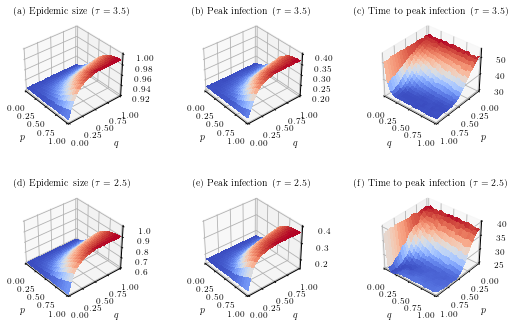

In [15]:
#fig, ax = plt.subplots(ncols=3)
mosaic = """
    ABC
    DEF
    """

N = 1e4

fig = plt.figure(constrained_layout=True)

ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

ax["A"].remove()
ax["A"]=fig.add_subplot(2,3,1,projection='3d')
ax["B"].remove()
ax["B"]=fig.add_subplot(2,3,2,projection='3d')
ax["C"].remove()
ax["C"]=fig.add_subplot(2,3,3,projection='3d')
ax["D"].remove()
ax["D"]=fig.add_subplot(2,3,4,projection='3d')
ax["E"].remove()
ax["E"]=fig.add_subplot(2,3,5,projection='3d')
ax["F"].remove()
ax["F"]=fig.add_subplot(2,3,6,projection='3d')

s_arr_25 = []
i_arr_25 = []
t_arr_25 = []

s_arr_35 = []
i_arr_35 = []
t_arr_35 = []

for q in qs:
    for p in ps:
        
        s_arr_25_ = []
        i_arr_25_ = []
        t_arr_25_ = []

        s_arr_35_ = []
        i_arr_35_ = []
        t_arr_35_ = []
        
        for e in range(230):
            
            s = np.load("../data/targeted_edge_removal/3.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/targeted_edge_removal/3.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/targeted_edge_removal/3.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            
            s_arr_35_.append(float(s)/N)
            i_arr_35_.append(float(i)/N)
            t_arr_35_.append(float(t))
            
            s = np.load("../data/targeted_edge_removal/2.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/targeted_edge_removal/2.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/targeted_edge_removal/2.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")

            s_arr_25_.append(float(s)/N)
            i_arr_25_.append(float(i)/N)
            t_arr_25_.append(float(t))

        s_arr_35.append(np.mean(s_arr_35_))
        i_arr_35.append(np.mean(i_arr_35_))
        t_arr_35.append(np.mean(t_arr_35_))
        
        s_arr_25.append(np.mean(s_arr_25_))
        i_arr_25.append(np.mean(i_arr_25_))
        t_arr_25.append(np.mean(t_arr_25_))
        
s_arr_25 = np.array(s_arr_25).reshape(len(qs),len(ps))
i_arr_25 = np.array(i_arr_25).reshape(len(qs),len(ps))
t_arr_25 = np.array(t_arr_25).reshape(len(qs),len(ps))

s_arr_35 = np.array(s_arr_35).reshape(len(qs),len(ps))
i_arr_35 = np.array(i_arr_35).reshape(len(qs),len(ps))
t_arr_35 = np.array(t_arr_35).reshape(len(qs),len(ps))

#text = ax["A"].text(0.02*1,0.9*0.5+0.5,r"(a)")
#text = ax["B"].text(0.02*1,0.9*0.25+0.15,r"(b)")
#text = ax["C"].text(0.02*1,0.9*40+20,r"(c)")

#text = ax["D"].text(0.02*1,0.9*1,r"(d)",color="white")
#text = ax["E"].text(0.02*1,0.9*1,r"(e)",color="white")
#text = ax["F"].text(0.02*1,0.9*1,r"(f)",color="white")

# Plot the surface.
ax["A"].plot_surface(Ps, Qs, 1-s_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["B"].plot_surface(Ps, Qs, i_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["C"].plot_surface(Ps, Qs, t_arr_35, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax["D"].plot_surface(Ps, Qs, 1-s_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["E"].plot_surface(Ps, Qs, i_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax["F"].plot_surface(Ps, Qs, t_arr_25, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax["A"].set_title(r"(a) Epidemic size ($\tau=3.5$)")
ax["B"].set_title(r"(b) Peak infection ($\tau=3.5$)")
ax["C"].set_title(r"(c) Time to peak infection ($\tau=3.5$)")

ax["D"].set_title(r"(d) Epidemic size ($\tau=2.5$)")
ax["E"].set_title(r"(e) Peak infection ($\tau=2.5$)")
ax["F"].set_title(r"(f) Time to peak infection ($\tau=2.5$)")

ax["A"].set_zlim(0.92,1.0)
ax["B"].set_zlim(0.2,0.4)
ax["C"].set_zlim(30,55)
ax["D"].set_zlim(0.6,1.0)
ax["E"].set_zlim(0.15,0.4)
ax["F"].set_zlim(25,40)
ax["F"].set_zticks([25,30,35,40])
ax["A"].set_xlim(0,1)
ax["B"].set_xlim(0,1)
ax["C"].set_xlim(0,1)
ax["A"].set_ylim(0,1)
ax["B"].set_ylim(0,1)
ax["C"].set_ylim(0,1)

ax["D"].set_xlim(0,1)
ax["E"].set_xlim(0,1)
ax["F"].set_xlim(0,1)
ax["D"].set_ylim(0,1)
ax["E"].set_ylim(0,1)
ax["F"].set_ylim(0,1)

ax["A"].set_xlabel(r"$p$")
ax["B"].set_xlabel(r"$p$")
ax["C"].set_xlabel(r"$p$")
ax["D"].set_xlabel(r"$p$")
ax["E"].set_xlabel(r"$p$")
ax["F"].set_xlabel(r"$p$")

ax["A"].set_ylabel(r"$q$")
ax["B"].set_ylabel(r"$q$")
ax["C"].set_ylabel(r"$q$")
ax["D"].set_ylabel(r"$q$")
ax["E"].set_ylabel(r"$q$")
ax["F"].set_ylabel(r"$q$")

ax["A"].view_init(35, -40)
ax["B"].view_init(35, -40)
ax["C"].view_init(35, 40)
ax["D"].view_init(35, -40)
ax["E"].view_init(35, -40)
ax["F"].view_init(35, 40)

tmp_planes = ax["C"].zaxis._PLANES 
ax["C"].zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])

tmp_planes = ax["F"].zaxis._PLANES 
ax["F"].zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4,hspace=0.6)

plt.savefig("edge_removal_targeted_3d.png",dpi=480,bbox_inches='tight')
plt.show()

In [195]:
np.min(1-s_arr_25)

0.5869